In [2]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib widget
import seaborn as sns
sns.set_context("notebook")
# colors = sns.color_palette("husl",9)
import h5py

# colors = np.asarray([(235, 172, 35), (184, 0, 88), (0, 140, 249), (0, 110, 0), (0, 187, 173), (209, 99, 230), (178, 69, 2), (255, 146, 135), (89, 84, 214), (0, 198, 248), (135, 133, 0), (0, 167, 108), (189, 189, 189)]) / 255
# colors = np.asarray([(152, 68, 100), (94, 204, 171), (86, 100, 26), (192, 175, 251), (230, 161, 118), (0, 103, 138),(205, 205, 205)]) / 255 
colors = sns.husl_palette(n_colors=9, h=0.01, s=0.9, l=0.65, as_cmap=False)
font = {'size'   : 14}
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

# colwidth = 384.0 pt
pt = 1./72.27 # Hundreds of years of history... 72.27 points to an inch.
my_width = 384.0 * pt
golden = (1 + 5 ** 0.5) / 2
my_height = my_width / golden

In [3]:
# import h5 data named nlpse_data.h5

with h5py.File('nlpse_data/nlpse_data.h5', 'r') as hf:
    # get all variables from data file 
    Rnlpse = hf['R'][:]
    y = hf['y'][:]
    x = hf['x'][:]
    u = hf['u'][:]
    v = hf['v'][:]
    w = hf['w'][:]
    p = hf['p'][:]
    U = hf['U'][:]
    Uy = hf['Uy'][:]
    V = hf['V'][:]
    alpha_01 = hf['alpha/alpha_01'][:]
    alpha_02 = hf['alpha/alpha_02'][:]

nx = Rnlpse.size

    # alpha_11 = hf['alpha/alpha_11'][:]

print(f"Num stations collected so far = {Rnlpse.size}\n")
print(f"Number of grid points used in the wall normal direction = {u.shape[-1]}\n")

Re_x = 3.3e4
Uinf_star = 500e-2
X0_star = 10e-2
r_star = 320e-2
k_star = 1 / r_star
lambda_z_star = 9e-3
# beta = 0.38372
beta = 0.38430869744999996

nu_star = Uinf_star * X0_star / Re_x 

l0 = np.sqrt(nu_star * X0_star / Uinf_star)
xstar = x * l0 
Uinf = 500e-2 # dimensional
nx = Rnlpse.size

delta99 = 5.325622003688368 # from the LST solve 


Num stations collected so far = 425

Number of grid points used in the wall normal direction = 80



In [4]:
umax = np.max(np.abs(u), axis=3)
vmax = np.max(np.abs(v), axis=3)
wmax = np.max(np.abs(w), axis=3)

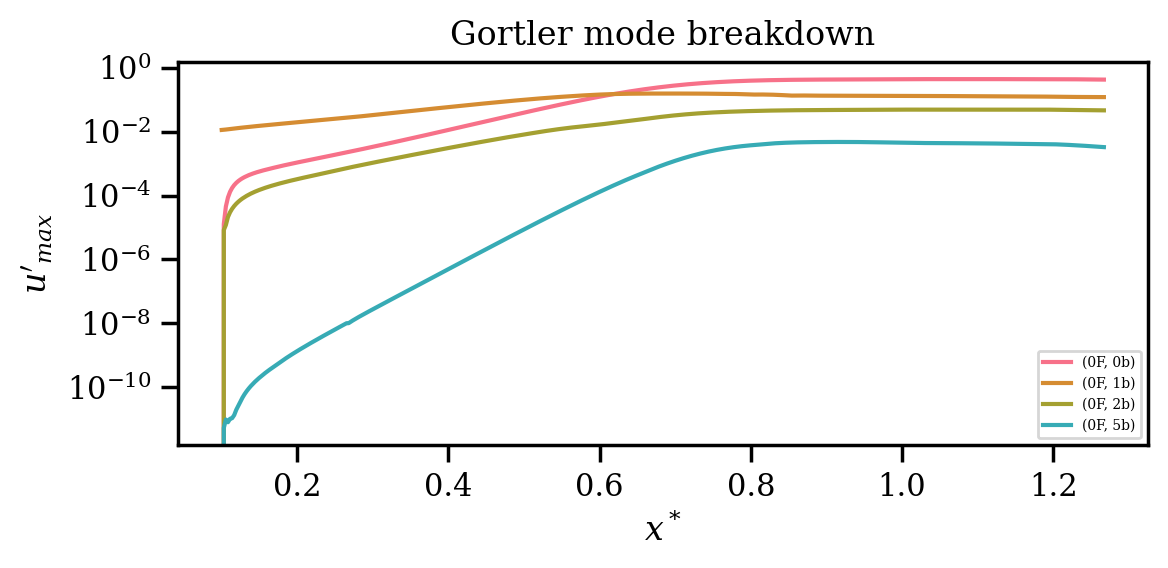

In [5]:


plt.figure(figsize=(6,3),dpi=200)
plt.semilogy(xstar, umax[0,0,:], color=colors[0], label=f'({0}F, {0}b)')
plt.semilogy(xstar, umax[0,1,:], color=colors[1], label=f'({0}F, {1}b)')
plt.semilogy(xstar, umax[0,2,:], color=colors[2], label=f'({0}F, {2}b)')
plt.semilogy(xstar, umax[0,5,:], color=colors[5], label=f'({0}F, {5}b)')

plt.legend(prop={'size': 5})
plt.xlabel(r'$x^*$')
plt.ylabel(r"$u'_{max}$")
plt.title('Gortler mode breakdown')
plt.tight_layout()

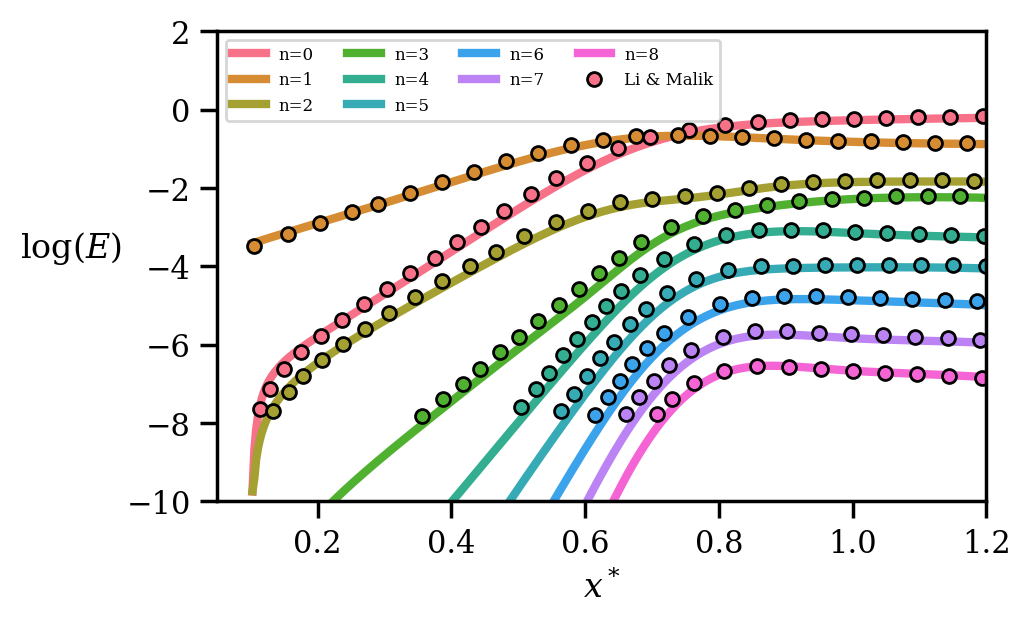

In [6]:
u_star = u #* Uinf 
v_star = v #* Uinf 
w_star = w #* Uinf

def En(u,v,w,y,n):
    E = (np.trapz(np.abs(u[0,n,:,:])**2 + np.abs(v[0,n,:,:])**2 + np.abs(w[0,n,:,:])**2, y, axis=1))
    return E

def E0(u,v,w,y):
    E = 0.5 * (np.trapz(np.abs(u)**2 + np.abs(w)**2, y, axis=1))
    return E 

E_0 = E0(u_star[0,0,:,:],v_star[0,0,:,:], w_star[0,0,:,:], y)
E_1 = En(u_star,v_star,w_star,y,n=1)
E_2 = En(u_star,v_star,w_star,y,n=2)
 
numN = np.shape(u_star)[1]
E = np.zeros((numN, nx))
for nn in range(numN):
    if nn == 0:
        E[nn,:] = E0(u_star[0,nn,:,:],v_star[0,nn,:,:],w_star[0,nn,:,:],y)
    else:
        E[nn,:] = En(u_star,v_star,w_star,y,n=nn)

ref_dir = 'ref_data/'

mal_e0 = np.genfromtxt(ref_dir + 'mode0.csv',delimiter=',')
mal_e1 = np.genfromtxt(ref_dir + 'mode1.csv',delimiter=',')
mal_e2 = np.genfromtxt(ref_dir + 'mode2.csv',delimiter=',')
mal_e3 = np.genfromtxt(ref_dir + 'mode3.csv',delimiter=',')
mal_e4 = np.genfromtxt(ref_dir + 'mode4.csv',delimiter=',')
mal_e5 = np.genfromtxt(ref_dir + 'mode5.csv',delimiter=',')
mal_e6 = np.genfromtxt(ref_dir + 'mode6.csv',delimiter=',')
mal_e7 = np.genfromtxt(ref_dir + 'mode7.csv',delimiter=',')
mal_e8 = np.genfromtxt(ref_dir + 'mode8.csv',delimiter=',')

# SMALL_SIZE = 6
# MEDIUM_SIZE = 10
# BIGGER_SIZE = 14

# plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
lw = 3
ms = 5
# mew = 2

plt.figure(figsize=(my_width, my_height),dpi=200);
for nn in range(numN):
    plt.plot(xstar[1:], np.log10(E[nn,1:]), color=colors[nn], linewidth=lw, label=f"n={nn}")

# plot reference data

skip = 3
plt.plot(mal_e0[::skip,0], mal_e0[::skip,1], 'o', markeredgecolor='k', markersize=ms, color=colors[0], label='Li & Malik')
plt.plot(mal_e1[::skip,0], mal_e1[::skip,1], 'o', markeredgecolor='k', markersize=ms, color=colors[1])
plt.plot(mal_e2[::skip,0], mal_e2[::skip,1], 'o', markeredgecolor='k', markersize=ms, color=colors[2])
plt.plot(mal_e3[::skip,0], mal_e3[::skip,1], 'o', markeredgecolor='k', markersize=ms, color=colors[3])
plt.plot(mal_e4[::skip,0], mal_e4[::skip,1], 'o', markeredgecolor='k',  markersize=ms, color=colors[4])
plt.plot(mal_e5[::skip,0], mal_e5[::skip,1], 'o', markeredgecolor='k',  markersize=ms, color=colors[5])
plt.plot(mal_e6[::skip,0], mal_e6[::skip,1], 'o', markeredgecolor='k', markersize=ms, color=colors[6])
plt.plot(mal_e7[::skip,0], mal_e7[::skip,1], 'o', markeredgecolor='k', markersize=ms, color=colors[7])
plt.plot(mal_e8[::skip,0], mal_e8[::skip,1], 'o', markeredgecolor='k', markersize=ms, color=colors[8])

plt.legend(prop={'size': 6}, ncols=4, frameon=True)
plt.xlabel(r'$x^*$')
plt.ylabel(r'$\log(E)$', rotation=0, labelpad=20)
plt.ylim([-10,2])
plt.xlim([0.05,1.2]);
plt.tight_layout()
plt.savefig('gortler_energy.pdf')

idx = 327
xstar = 1.0000378662953446
Error = 0.0


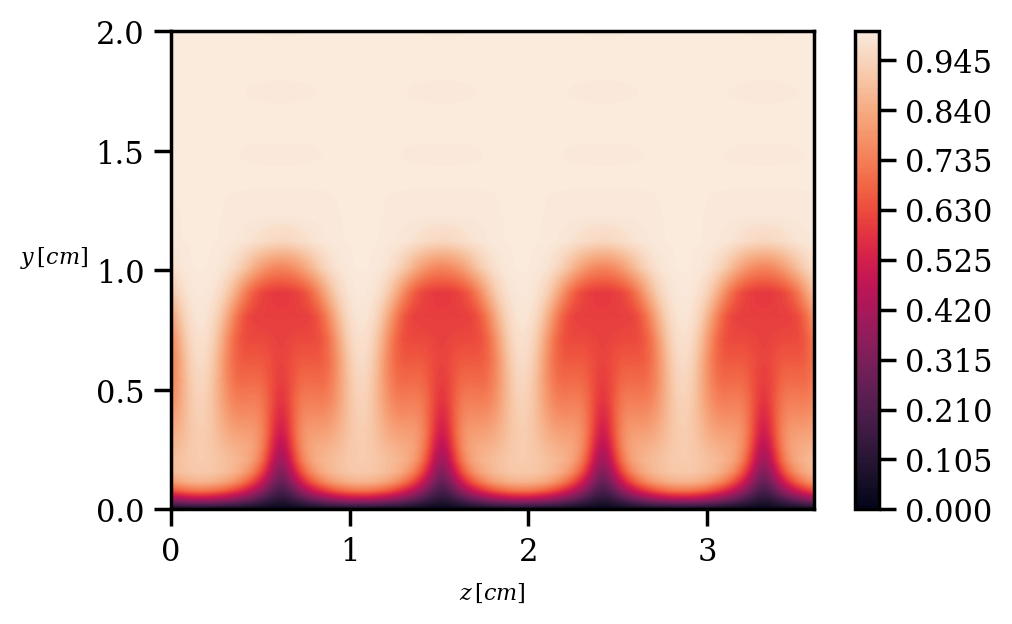

In [16]:
try:
    idx = np.where(xstar >= 1.0)[0][0]
except:
    idx = nx-1
    # idx = 0

print(f"idx = {idx}")
print(f"xstar = {xstar[idx]}")

# beta = 0.38372 / l0 
beta = 0.38430869744999996 / l0 
lambda_z = 2 * np.pi / beta

# zmin = -0.018
# zmax = 0.018

zmin = 0
# zmin = lambda_z * -2
zmax = lambda_z * 4  # multiply by 100 to convert to cm

nz = 400
z = np.linspace(zmin, zmax, nz)

ZZ, YY = np.meshgrid(z, y)

U_prof = U[:, idx]
V_prof = V[:, idx]

UU = np.zeros((U.shape[0], nz), dtype = complex)
UU2 = np.zeros((U.shape[0], nz), dtype = complex)
VV = np.zeros((U.shape[0], nz))
WW = np.zeros((U.shape[0], nz))

for nn in range(u.shape[1]):
# for nn in range(2):
    for ii in range(nz):
        if nn == 0:
            # UU[:,ii] += 0 
            UU[:,ii] += U_prof
            UU2[:,ii] += U_prof
        else:

            # phase_shift = np.exp(1.0j * nn * beta/89.0)
            phase_shift = np.exp(1.0j * nn * beta/4.0)
            # phase_shift = 1.0
            
            UU[:,ii] += u[0,nn,idx,:] * phase_shift * np.exp(1.0j * nn * beta * z[ii])  + np.conjugate(u[0,nn,idx,:] * phase_shift * np.exp(1.0j * nn * beta * z[ii]) )
            # UU2[:,ii] += 2 * np.real(u[0,nn,idx,:]) * np.cos(nn * beta * z[ii])
            # UU2[:,ii] += 2 * np.real(u[0,nn,idx,:] * np.exp(1.0j * nn * beta * z[ii]))

# want to pring maximum imaginary value in UU array 
buf = np.max(np.abs(np.imag(UU)))
print(f"Error = {buf}")

UU = np.real(UU)

# clf = np.linspace(0.0,1.2,200)
plt.figure(figsize=(my_width, my_height),dpi=200);
plt.contourf(ZZ * 100 ,YY * l0 * 100 , UU ,200,cmap='rocket')
plt.xlabel(r'$z \,[cm]$',labelpad=5, fontsize=8)
plt.ylabel(r'$y \,[cm]$',rotation=0,labelpad=15,fontsize=8)
plt.ylim([0,2.0])
# plt.title(r'$U$')
plt.colorbar()
# tick_locations = np.asarray([0, 0.009, 0.018, 0.027, 0.036]) * 100;
# plt.xticks(tick_locations);
plt.tight_layout()
plt.savefig('gortler_contour.pdf')

/tmp/ipykernel_3239871/2192691076.py:35: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in plot2.collections:


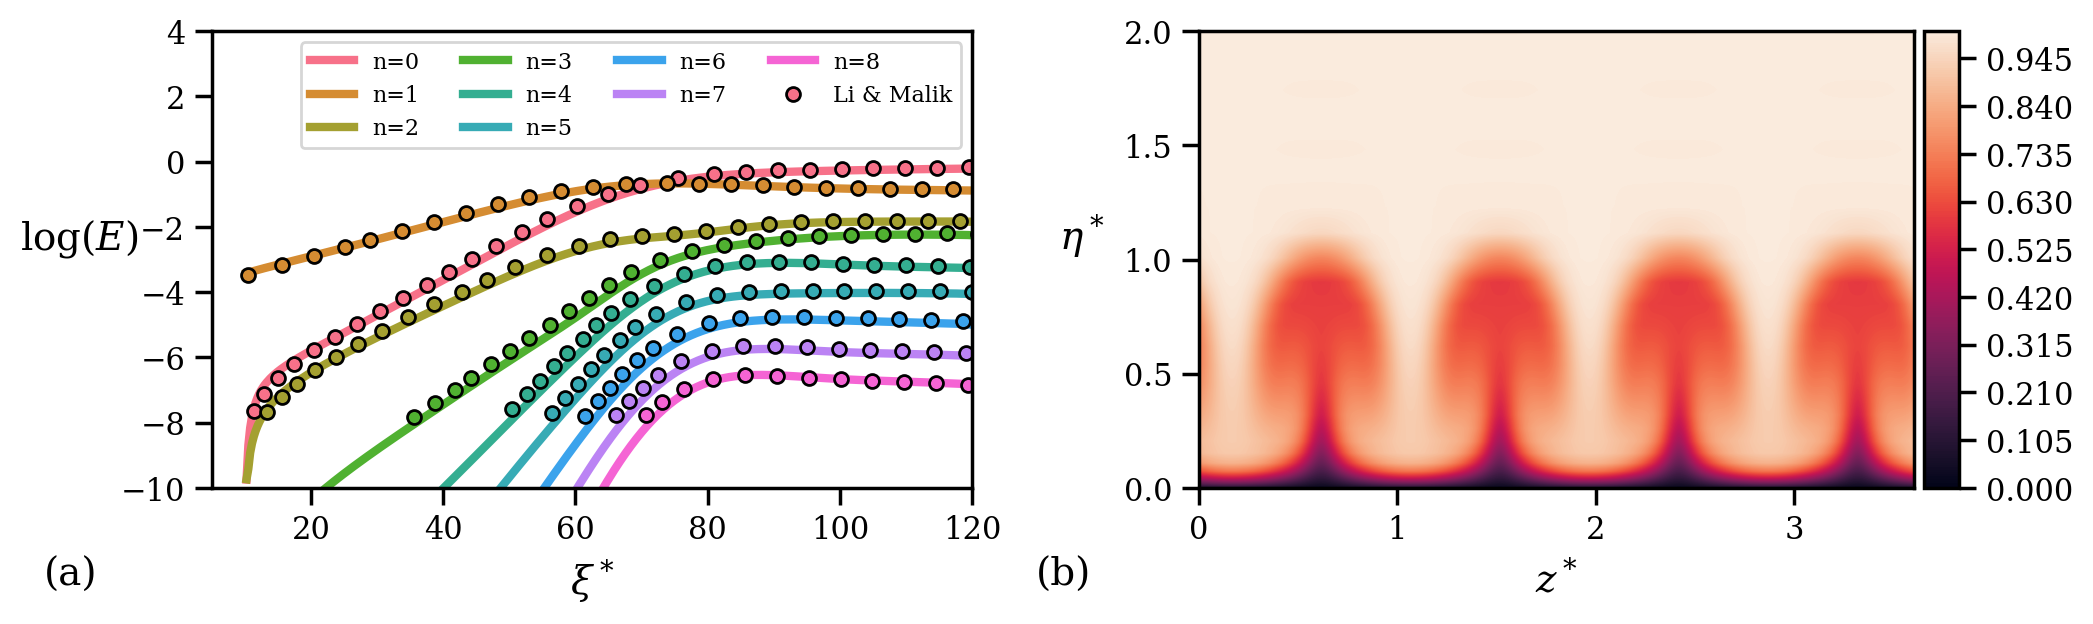

In [8]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1,2, figsize=(my_width*2, my_height),dpi=200);
# because i double the width, i need to double the fontsizes 
FONTSIZE = 14

for nn in range(numN):
    ax[0].plot(xstar[1:]*100, np.log10(E[nn,1:]), color=colors[nn], linewidth=lw, label=f"n={nn}")

# plot reference data

skip = 3
ax[0].plot(mal_e0[::skip,0]*100, mal_e0[::skip,1], 'o', markeredgecolor='k', markersize=ms, color=colors[0], label='Li & Malik')
ax[0].plot(mal_e1[::skip,0]*100, mal_e1[::skip,1], 'o', markeredgecolor='k', markersize=ms, color=colors[1])
ax[0].plot(mal_e2[::skip,0]*100, mal_e2[::skip,1], 'o', markeredgecolor='k', markersize=ms, color=colors[2])
ax[0].plot(mal_e3[::skip,0]*100, mal_e3[::skip,1], 'o', markeredgecolor='k', markersize=ms, color=colors[3])
ax[0].plot(mal_e4[::skip,0]*100, mal_e4[::skip,1], 'o', markeredgecolor='k',  markersize=ms, color=colors[4])
ax[0].plot(mal_e5[::skip,0]*100, mal_e5[::skip,1], 'o', markeredgecolor='k',  markersize=ms, color=colors[5])
ax[0].plot(mal_e6[::skip,0]*100, mal_e6[::skip,1], 'o', markeredgecolor='k', markersize=ms, color=colors[6])
ax[0].plot(mal_e7[::skip,0]*100, mal_e7[::skip,1], 'o', markeredgecolor='k', markersize=ms, color=colors[7])
ax[0].plot(mal_e8[::skip,0]*100, mal_e8[::skip,1], 'o', markeredgecolor='k', markersize=ms, color=colors[8])

ax[0].legend(prop={'size': 8}, ncols=4, frameon=True)
ax[0].set_xlabel(r'$\xi^*$', fontsize=FONTSIZE)
ax[0].set_ylabel(r'$\log(E)$', rotation=0, labelpad=15, fontsize=FONTSIZE)
ax[0].set_ylim([-10,4])
ax[0].set_xlim([0.05*100,1.2*100]);

plot2 = ax[1].contourf(ZZ * 100 ,YY * l0 * 100 , UU ,200,cmap='rocket')
ax[1].set_xlabel(r'$z^*$',labelpad=5, fontsize=FONTSIZE)
ax[1].set_ylabel(r'$\eta^*$',rotation=0,labelpad=15,fontsize=FONTSIZE)
ax[1].set_ylim([0,2.0])

# do this to make pdf contour look nice
for c in plot2.collections:
    c.set_edgecolor("face")

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(plot2, cax=cax, orientation='vertical')

# plt.colorbar(plot2, cax=ax[1])
# plt.title(r'$U$')
# ax[1].set_colorbar()

# Add annotations (a) and (b) outside the plot area on the bottom left
ax[0].text(-0.15, -0.15, '(a)', transform=ax[0].transAxes, fontsize=FONTSIZE, va='top', ha='right')
ax[1].text(-0.15, -0.15, '(b)', transform=ax[1].transAxes, fontsize=FONTSIZE, va='top', ha='right')

plt.tight_layout()
# plt.savefig('gortler_energy_contour.pdf')

/tmp/ipykernel_3239871/1456397535.py:38: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in plot2.collections:


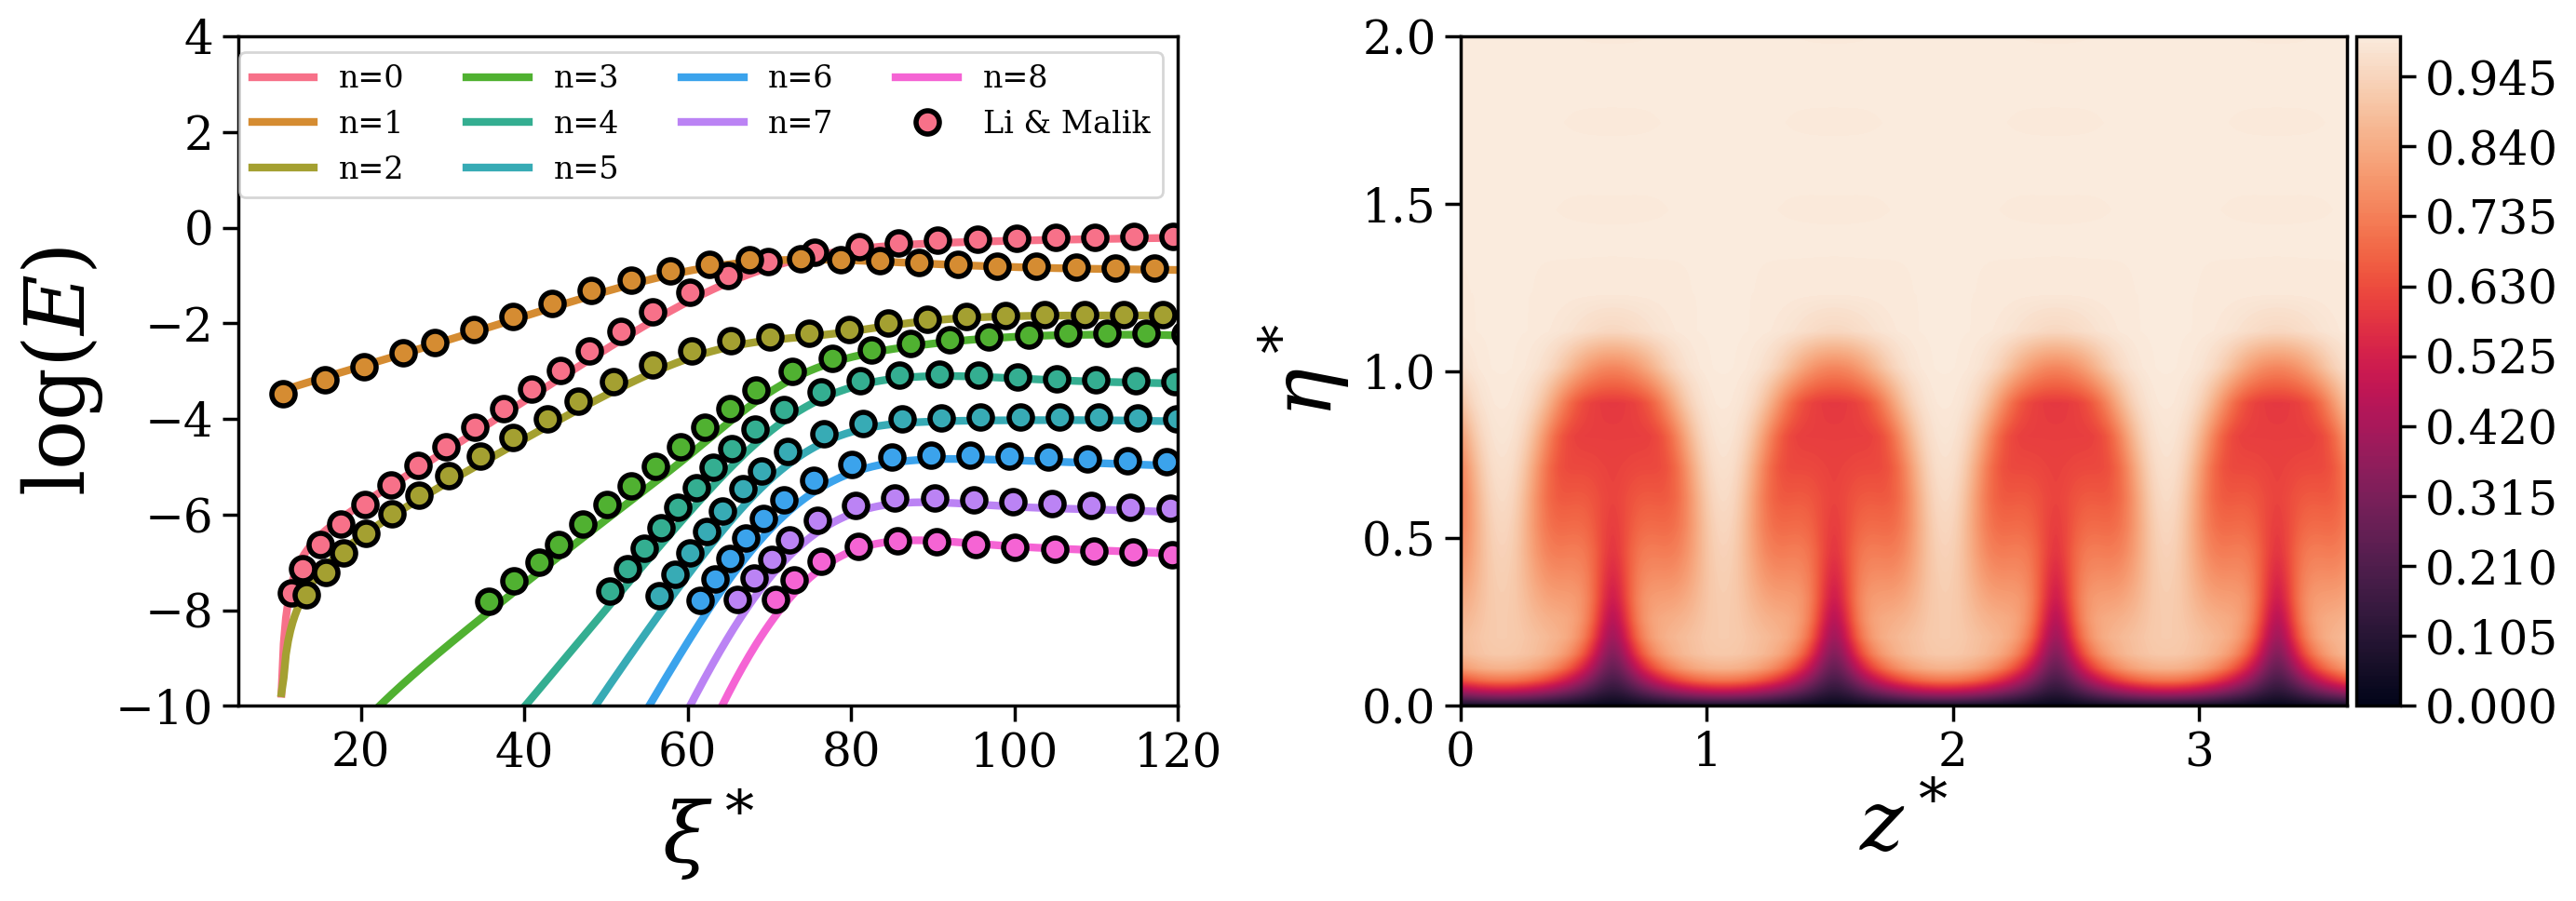

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1,2, figsize=(14, 5),dpi=200);
# because i double the width, i need to double the fontsizes 
FONTSIZE = 14

for nn in range(numN):
    ax[0].plot(xstar[1:]*100, np.log10(E[nn,1:]), color=colors[nn], linewidth=lw, label=f"n={nn}")

# plot reference data
ms = 9
mew = 2
lw=5

skip = 3
ax[0].plot(mal_e0[::skip,0]*100, mal_e0[::skip,1], 'o', markeredgecolor='k', markersize=ms, markeredgewidth=mew, color=colors[0], label='Li & Malik')
ax[0].plot(mal_e1[::skip,0]*100, mal_e1[::skip,1], 'o', markeredgecolor='k', markersize=ms, markeredgewidth=mew, color=colors[1])
ax[0].plot(mal_e2[::skip,0]*100, mal_e2[::skip,1], 'o', markeredgecolor='k', markersize=ms, markeredgewidth=mew, color=colors[2])
ax[0].plot(mal_e3[::skip,0]*100, mal_e3[::skip,1], 'o', markeredgecolor='k', markersize=ms, markeredgewidth=mew, color=colors[3])
ax[0].plot(mal_e4[::skip,0]*100, mal_e4[::skip,1], 'o', markeredgecolor='k',  markersize=ms, markeredgewidth=mew, color=colors[4])
ax[0].plot(mal_e5[::skip,0]*100, mal_e5[::skip,1], 'o', markeredgecolor='k',  markersize=ms, markeredgewidth=mew, color=colors[5])
ax[0].plot(mal_e6[::skip,0]*100, mal_e6[::skip,1], 'o', markeredgecolor='k', markersize=ms, markeredgewidth=mew, color=colors[6])
ax[0].plot(mal_e7[::skip,0]*100, mal_e7[::skip,1], 'o', markeredgecolor='k', markersize=ms, markeredgewidth=mew, color=colors[7])
ax[0].plot(mal_e8[::skip,0]*100, mal_e8[::skip,1], 'o', markeredgecolor='k', markersize=ms, markeredgewidth=mew, color=colors[8])

ax[0].legend(prop={'size': 12}, ncols=4, frameon=True)
ax[0].set_xlabel(r'$\xi^*$', fontsize=32)
ax[0].set_ylabel(r'$\log(E)$',fontsize=32)
ax[0].set_ylim([-10,4])
ax[0].set_xlim([0.05*100,1.2*100]);

plot2 = ax[1].contourf(ZZ * 100 ,YY * l0 * 100 , UU ,200,cmap='rocket')
ax[1].set_xlabel(r'$z^*$',fontsize=32)
ax[1].set_ylabel(r'$\eta^*$',fontsize=32)
ax[1].set_ylim([0,2.0])

# do this to make pdf contour look nice
for c in plot2.collections:
    c.set_edgecolor("face")

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(plot2, cax=cax, orientation='vertical')


ax[0].tick_params(axis='both', which='major', labelsize=18)
ax[0].xaxis.get_offset_text().set_fontsize(18)
ax[1].tick_params(axis='both', which='major', labelsize=18)
ax[1].xaxis.get_offset_text().set_fontsize(18)
cax.tick_params(axis='both', which='major', labelsize=18)


# plt.colorbar(plot2, cax=ax[1])
# plt.title(r'$U$')
# ax[1].set_colorbar()

# Add annotations (a) and (b) outside the plot area on the bottom left
# ax[0].text(-0.15, -0.15, '(a)', transform=ax[0].transAxes, fontsize=FONTSIZE, va='top', ha='right')
# ax[1].text(-0.15, -0.15, '(b)', transform=ax[1].transAxes, fontsize=FONTSIZE, va='top', ha='right')


plt.tight_layout()
plt.savefig('/home/moin/cagonzal/aps2024_gortler_energy_contour0p9.pdf', bbox_inches='tight')

/tmp/ipykernel_3239871/2285820136.py:3: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(Rnlpse, np.real(alpha_01), 'o', markeredgecolor='k', color=colors[0], markevery=2, label=(0,1))
/tmp/ipykernel_3239871/2285820136.py:4: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(Rnlpse, np.real(alpha_02), 'o', markeredgecolor='k', color=colors[1], markevery=2, label=(0,2))
/tmp/ipykernel_3239871/2285820136.py:10: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to s

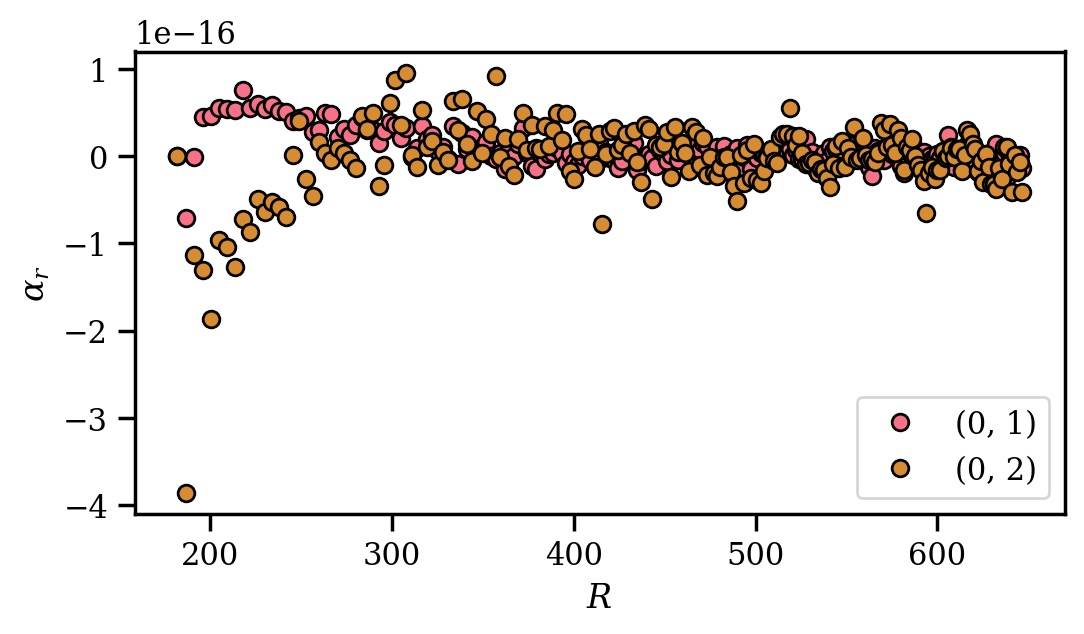

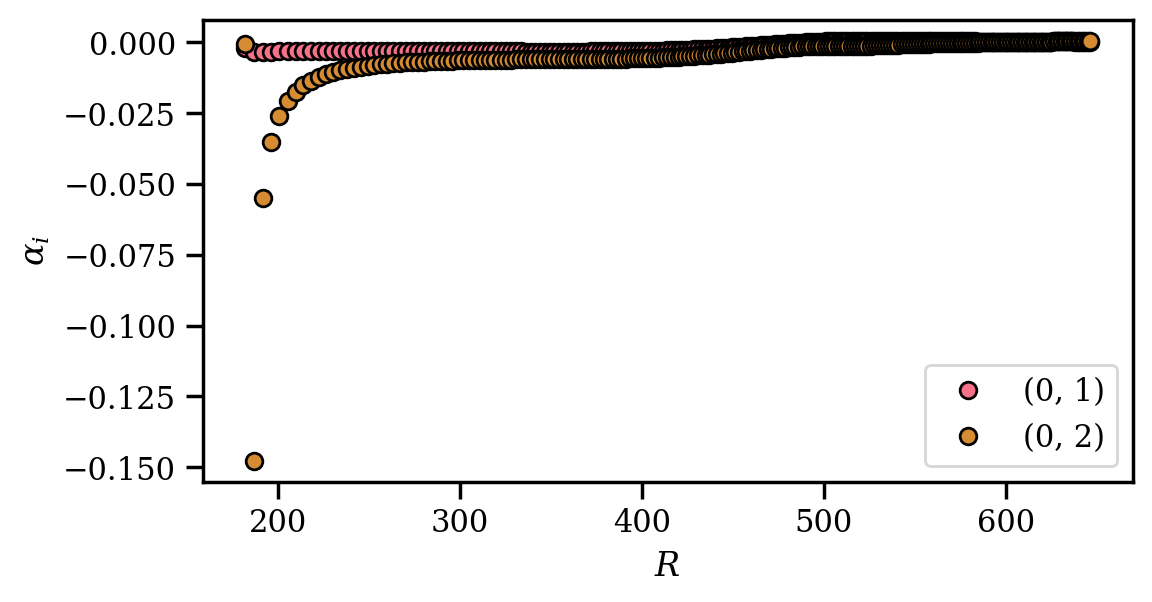

In [10]:
# want to plot R vs alpha_01 
plt.figure(figsize=(6,3),dpi=200)
plt.plot(Rnlpse, np.real(alpha_01), 'o', markeredgecolor='k', color=colors[0], markevery=2, label=(0,1))
plt.plot(Rnlpse, np.real(alpha_02), 'o', markeredgecolor='k', color=colors[1], markevery=2, label=(0,2))
plt.xlabel(r'$R$')
plt.ylabel(r'$\alpha_{r}$')
plt.legend()

plt.figure(figsize=(6,3),dpi=200)
plt.plot(Rnlpse, np.imag(alpha_01), 'o', markeredgecolor='k', color=colors[0], markevery=2, label=(0,1))
plt.plot(Rnlpse, np.imag(alpha_02), 'o', markeredgecolor='k', color=colors[1], markevery=2, label=(0,2))
plt.xlabel(r'$R$')
plt.ylabel(r'$\alpha_{i}$')
plt.legend()